
## Ashley Mersman
### NLP_Password_Strength_classifer
03-01-2023

In [1]:
#import modules and settings
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading dataset into DataFrame

In [2]:
data=pd.read_csv('data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
#Use .unique to determine the categories of password strength
data['strength'].unique()

array([1, 2, 0])

### Use isna().sum() to find missing values

In [4]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
#Which password shows null
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
#drop row with null password value
data.dropna(inplace=True)

In [7]:
#verify null values are 0
data.isnull().sum()

password    0
strength    0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

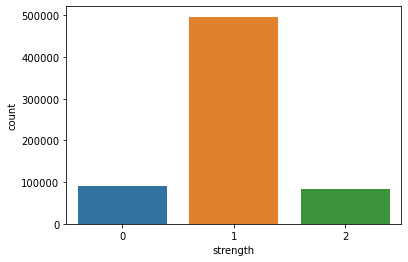

In [8]:
#use seaborn to create countplot of password strengths
sns.countplot(data['strength'])

In [9]:
#create array of the data 
password_tuple=np.array(data)

In [10]:
#view array
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

### Check robustness with random.shuffle()

In [11]:
import random
random.shuffle(password_tuple)

In [12]:
#seperate variables into x and y using list comprehension
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [13]:
#view independent variable
x

['kzde5577',
 'kino3434',
 'visi7k1yr',
 'kzde5577',
 'visi7k1yr',
 'megzy123',
 'lamborghin1',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'v1118714',
 'visi7k1yr',
 'u6c8vhow',
 'v1118714',
 'megzy123',
 'v1118714',
 'as326159',
 'u6c8vhow',
 'universe2908',
 'u6c8vhow',
 'kzde5577',
 'visi7k1yr',
 'universe2908',
 'kino3434',
 '6975038lp',
 'kzde5577',
 'klara-tershina3H',
 '52558000aaa',
 '612035180tok',
 '52558000aaa',
 '6975038lp',
 'czuodhj972',
 'jytifok873',
 'kino3434',
 'lamborghin1',
 'asgaliu11',
 'visi7k1yr',
 'intel1',
 'kzde5577',
 'elyass15@ajilent-ci',
 'kswa2mrv',
 'jerusalem393',
 'jytifok873',
 'megzy123',
 'klara-tershina3H',
 'as326159',
 '0169395484a',
 'AVYq1lDE4MgAZfNt',
 'asgaliu11',
 'sbl571017',
 'hpqkoxsn5',
 'memjan123',
 'yqugu927',
 '6975038lp',
 'TyWM72UNEex8Q8Y',
 'prisonbreak1',
 'visi7k1yr',
 'bozoxik602',
 'alimagik1',
 'fk9qi21m',
 'schalke04',
 'alimagik1',
 'WUt9IZzE0OQ7PkNE',
 'bozoxik602',
 'b4NbTxDEyNgG141J',
 'memjan123',
 'bozoxik602',
 'megzy123',

### Custom function to split input into characters of list

In [14]:
"""define function that separates 
characters of password into list of characters"""
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [15]:
#test function
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

### TF-IDF vectorizer to convert String data into numerical data

In [16]:
#import TF_IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
#Use TfidfVectorizer with tokenizer as custom function
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

### Apply TF-IDF vectorizer on independent variable

In [18]:
#apply TfidfVectorizer
X=vectorizer.fit_transform(x)

In [19]:
#check shape of X 
X.shape

(669639, 129)

In [20]:
#use get_feature_names() to look at all features
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x08',
 '\x10',
 '\x11',
 '\x12',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¼',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '—',
 '‚',
 '™']

In [21]:
first_document_vector=X[0]
first_document_vector

<1x129 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [22]:
#use .T to transpose vector and then get importance
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56669243],
        [0.        ],
        [0.5915855 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [23]:
#create DataFrame with tfidf features and importance
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591586
5,0.566692
z,0.335976
k,0.291936
d,0.285867
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


### Split data into train & test
  

In [24]:
#import from sklearn
from sklearn.model_selection import train_test_split

In [25]:
#split data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [26]:
#check train/test split
X_train.shape

(535711, 129)

In [27]:
X_test.shape

(133928, 129)

#### Apply Logistic on data as use-cas is Classification

In [28]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [29]:
#initialize LogisticRegression
clf=LogisticRegression(random_state=11,multi_class='multinomial')

In [30]:
#fit the model use the training data
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=11)

### Prediction for specific custom data

In [31]:
"""Check model with password, put into array and 
vectorize before calling clf.predict()"""
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

### Prediction on X_Test data

In [32]:
#prediction on X_test to compare y_test and y_pred
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### Check Accuracy of model using confusion_matrix and accuracy_score

In [33]:
#import confusion matrix and accuracy from metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [34]:
#define confusion matrix, print and determine accuracy
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5266 12556    17]
 [ 3887 93094  2479]
 [   41  5163 11425]]
0.8197314975210561


### Create report of your model

In [35]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.30      0.39     17839
           1       0.84      0.94      0.89     99460
           2       0.82      0.69      0.75     16629

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



### Visualize the Confusion Matrix

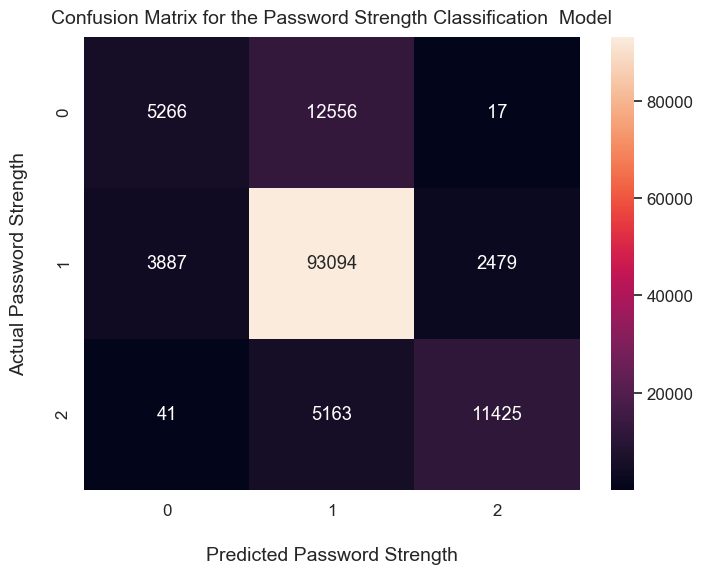

In [36]:
#import seaborn, matplotlib, and ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Password Strength", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['0', '1', '2'])

# set y-axis label and ticks
ax.set_ylabel("Actual Password Strength", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['0', '1', '2'])

# set plot title
ax.set_title("Confusion Matrix for the Password Strength Classification  Model", fontsize=14, pad=10)

plt.show()